In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind, f_oneway, chi2_contingency


In [ ]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


Univariate Analysis


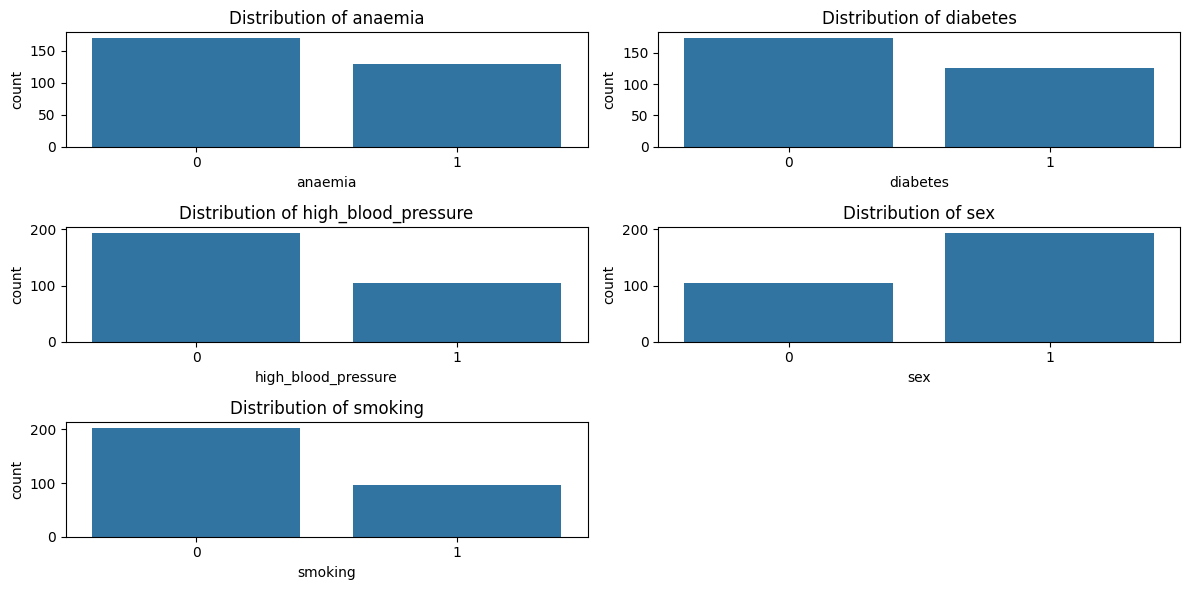

In [ ]:
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plt.figure(figsize=(12, 6))

for i in range(len(categorical_vars)):
  plt.subplot(3, 2, i+1)
  sns.countplot(data=df, x=categorical_vars[i])
  plt.title(f'Distribution of {categorical_vars[i]}')

plt.tight_layout()
plt.show()

Data Transformation


In [ ]:
df['creatinine_phosphokinase'] = np.sqrt(df['creatinine_phosphokinase'])
df['serum_creatinine'] = np.sqrt(df['serum_creatinine'])
df['platelets'] = np.sqrt(df['platelets'])
df['serum_sodium'] = np.square(df['serum_sodium'])

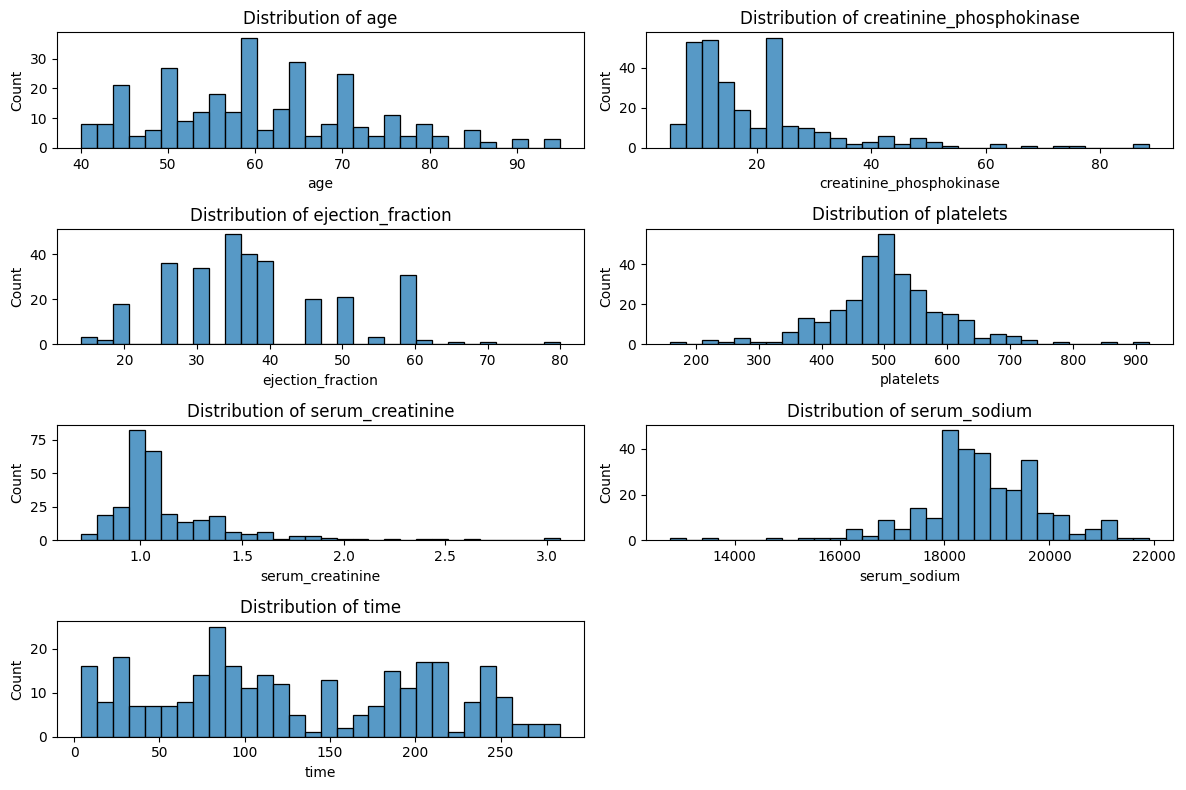

In [ ]:
numerical_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
plt.figure(figsize=(12, 8))
for i in range(len(numerical_vars)):
  plt.subplot(4, 2, i+1)
  sns.histplot(df[numerical_vars[i]], bins=30)
  plt.title(f'Distribution of {numerical_vars[i]}')

plt.tight_layout()
plt.show()

Multivariate Analysis

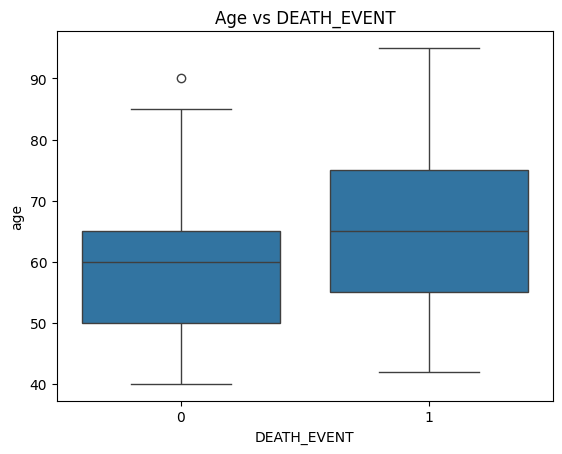

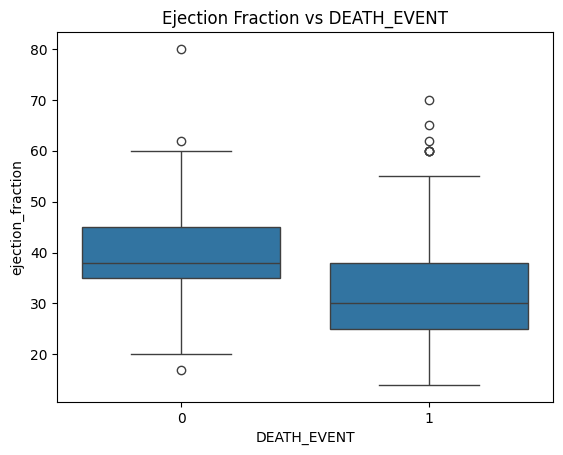

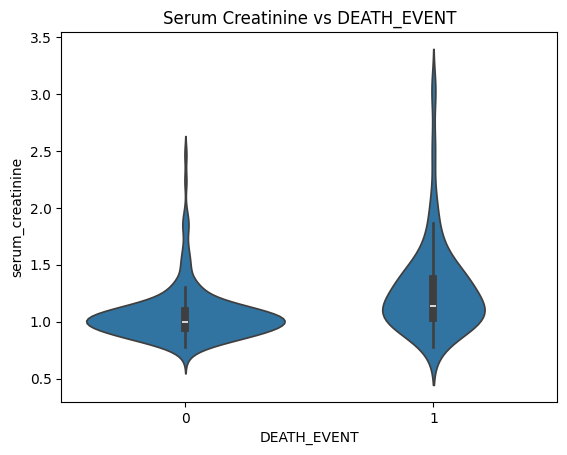

In [ ]:
# Age vs DEATH_EVENT
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age vs DEATH_EVENT')
plt.show()

# Ejection Fraction Vs DEATH_EVENT
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.title('Ejection Fraction vs DEATH_EVENT')
plt.show()

# Serum Creatinine Vs DEATH_EVENT
sns.violinplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine vs DEATH_EVENT')
plt.show()

In [ ]:
# T test between categorical and numerical features

survived = df[df['DEATH_EVENT'] == 0]['age']
died = df[df['DEATH_EVENT'] == 1]['age']

t_stat, p_value = ttest_ind(survived, died)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -4.520613504937705, p-value: 8.916762946533357e-06


The p-value is below a significance threshold (0.05) So, we reject the null hypothesis and conclude that there is a statistically significant difference between the groups.

In [ ]:
anova_result = f_oneway(df[df['sex'] == 0]['serum_creatinine'], df[df['sex'] == 1]['serum_creatinine'])
print(f"ANOVA result (serum_creatinine by sex): F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA result (serum_creatinine by sex): F-statistic = 0.11221051773255804, p-value = 0.7378778539230453


F-statistic: A ratio of the variance between the groups to the variance within the groups. The larger this value, the more likely it is that the group means are different.

p-value: The probability that the observed differences are due to chance. A low p-value (typically less than 0.05) suggests that the group means are significantly different.

p-value is greater than 0.05 and f-statistic is low so means are quite similar and difference is not by chance that is stastistically not significant.

In [ ]:
crosstab = pd.crosstab(df['DEATH_EVENT'], df['high_blood_pressure'])
print(crosstab)
crosstab_diabetes = pd.crosstab(df['DEATH_EVENT'], df['diabetes'])
print(crosstab_diabetes)

high_blood_pressure    0   1
DEATH_EVENT                 
0                    137  66
1                     57  39
diabetes       0   1
DEATH_EVENT         
0            118  85
1             56  40


In [ ]:
# Chisquare test between categorical and categorical features
crosstab = pd.crosstab(df['DEATH_EVENT'], df['high_blood_pressure'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 1.5434607612967581, p-value: 0.21410341199416902


Chi-square statistic: Measures how expectations compare to actual observed values.

p-value: If the p-value is less than 0.05, we reject the null hypothesis and conclude that the two variables are not independent (i.e., there is a significant association between them).

Here p-value is greater than 0.05 so the features are independent.

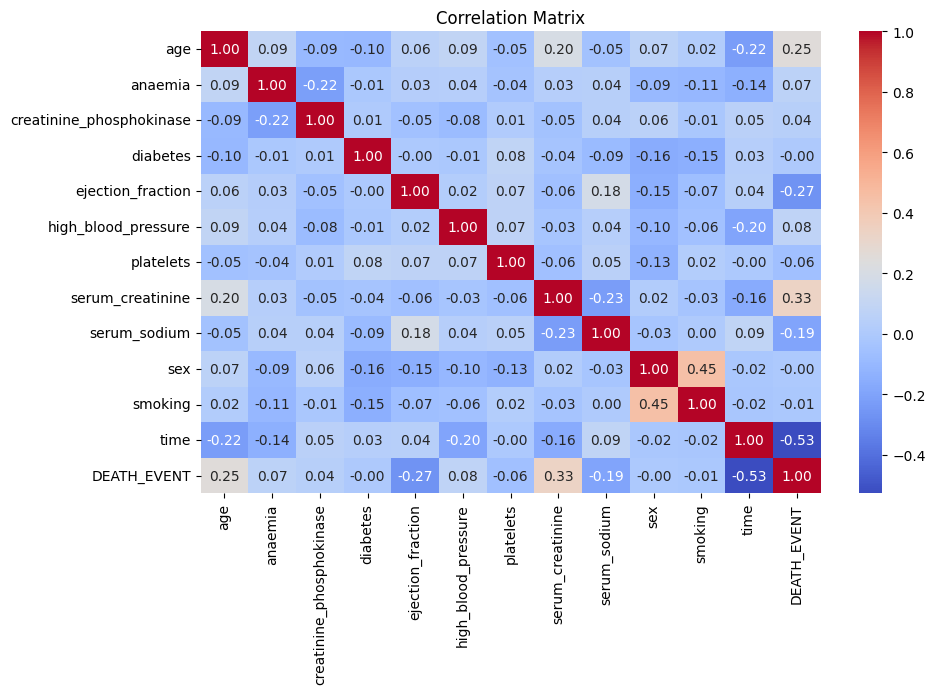

In [ ]:
plt.figure(figsize=(10, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix we can see that the features are not correleated properly.

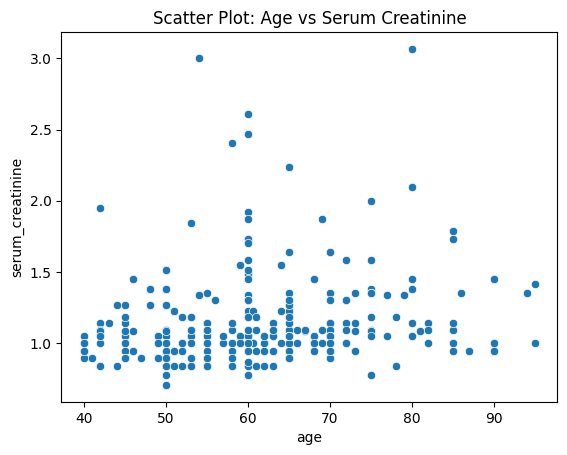

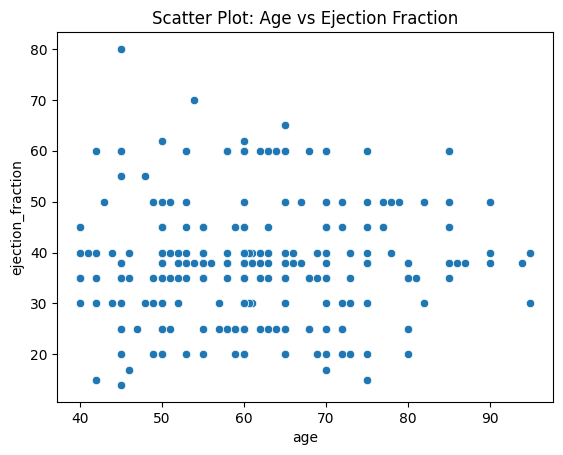

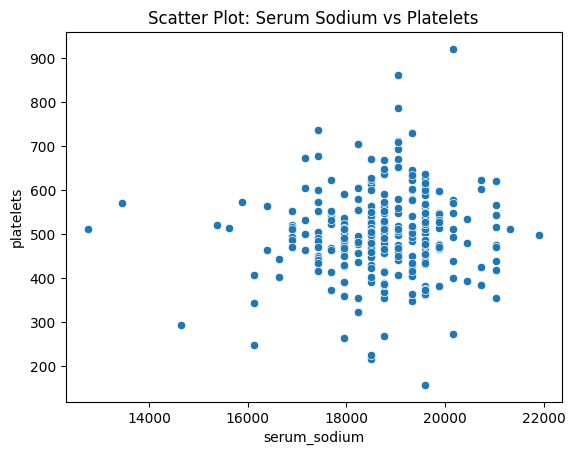

In [ ]:
# Numerical vs numerical features
sns.scatterplot(x='age', y='serum_creatinine', data=df)
plt.title('Scatter Plot: Age vs Serum Creatinine')
plt.show()

sns.scatterplot(x='age', y='ejection_fraction', data=df)
plt.title('Scatter Plot: Age vs Ejection Fraction')
plt.show()

sns.scatterplot(x='serum_sodium', y='platelets', data=df)
plt.title('Scatter Plot: Serum Sodium vs Platelets')
plt.show()

Remove Outliers

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_cleaned.shape


(241, 13)

Split dataset


In [ ]:
X = df_cleaned.drop(columns=['DEATH_EVENT'])
y = df_cleaned['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8493150684931506
